It is a binary classification problem in which we have to find where an employee earns leass than or equal to 50K or greater than 50K

###import dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###importing dataset

In [2]:
df = pd.read_csv("/content/adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


###preprocessing

In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
df.shape

(32561, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


finding the coloumns which contains null values:


In [7]:
#it will print the columns with null values , it is very usefull when there are hundreds of columns
Columns = df.columns
nulcol = []
for col in Columns:
  if(df[col].isnull().sum()!=0):
    nulcol.append(col)
print("columns with null values:",nulcol)

columns with null values: []


In [8]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

there are no null values in this dataset

**Data analysis:**

Here our target variable is salary

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


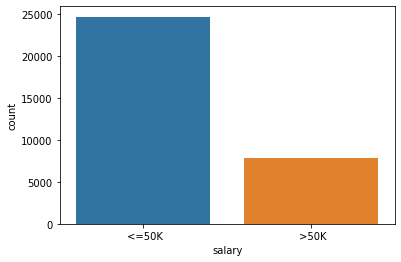

In [9]:
sns.countplot(df['salary'])

In [10]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

so, here 'salary' is imbalanced

24.03% percent of the total data belongs to >50k 

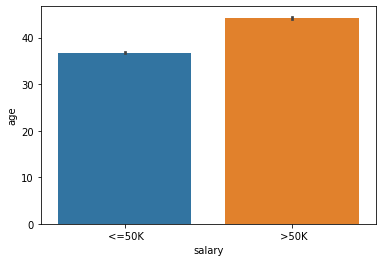

In [11]:
sns.barplot(x='salary',y='age',data=df)

In [12]:
df['workclass'].nunique()

9

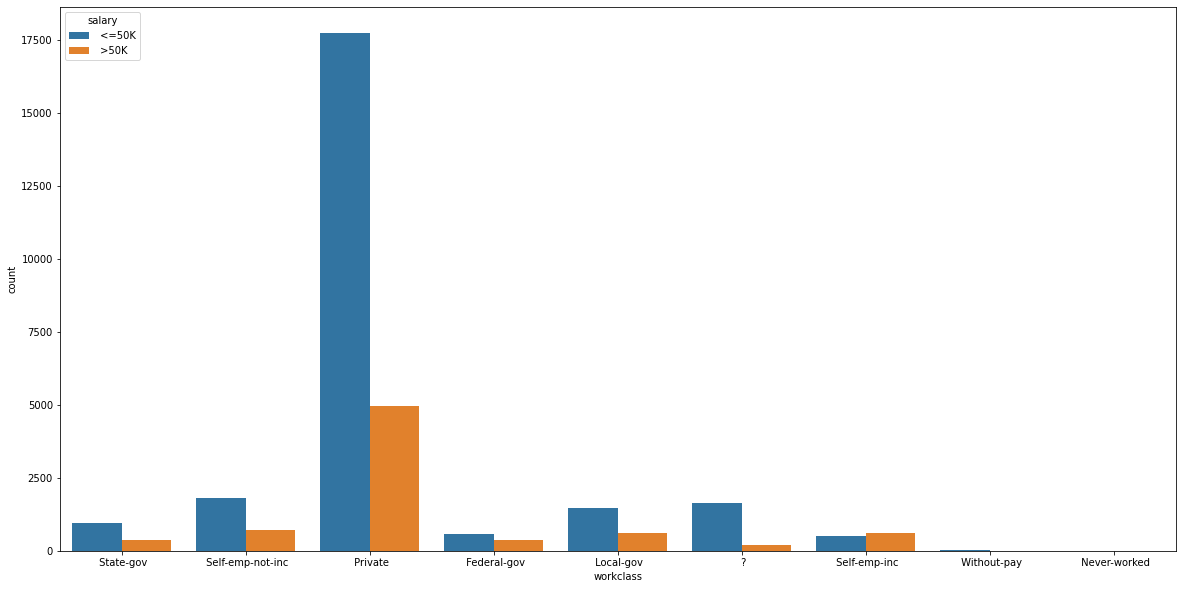

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(x='workclass',hue='salary',data=df)
plt.show()

the employee belongs to 'private' class are higher in number in both salary conditions. 

In [14]:
df['education'].nunique()

16

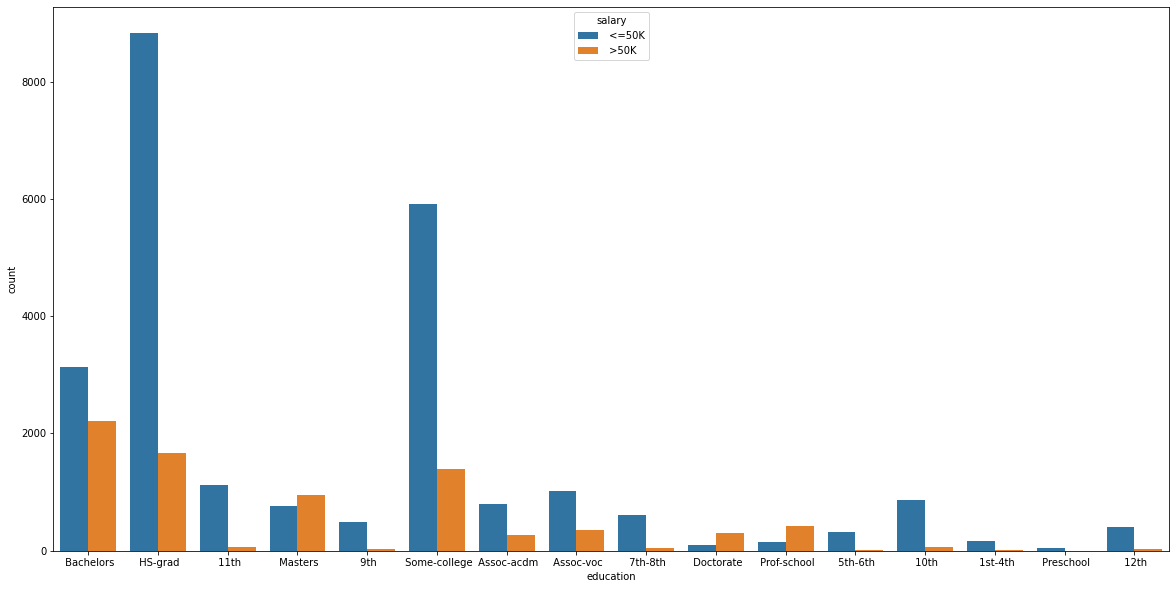

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x='education',hue='salary',data=df)
plt.show()

here from HS-grad we have more number of employee who earn less than or equal to 50K and from bachelors we have more number of employee who earn greater than 50K

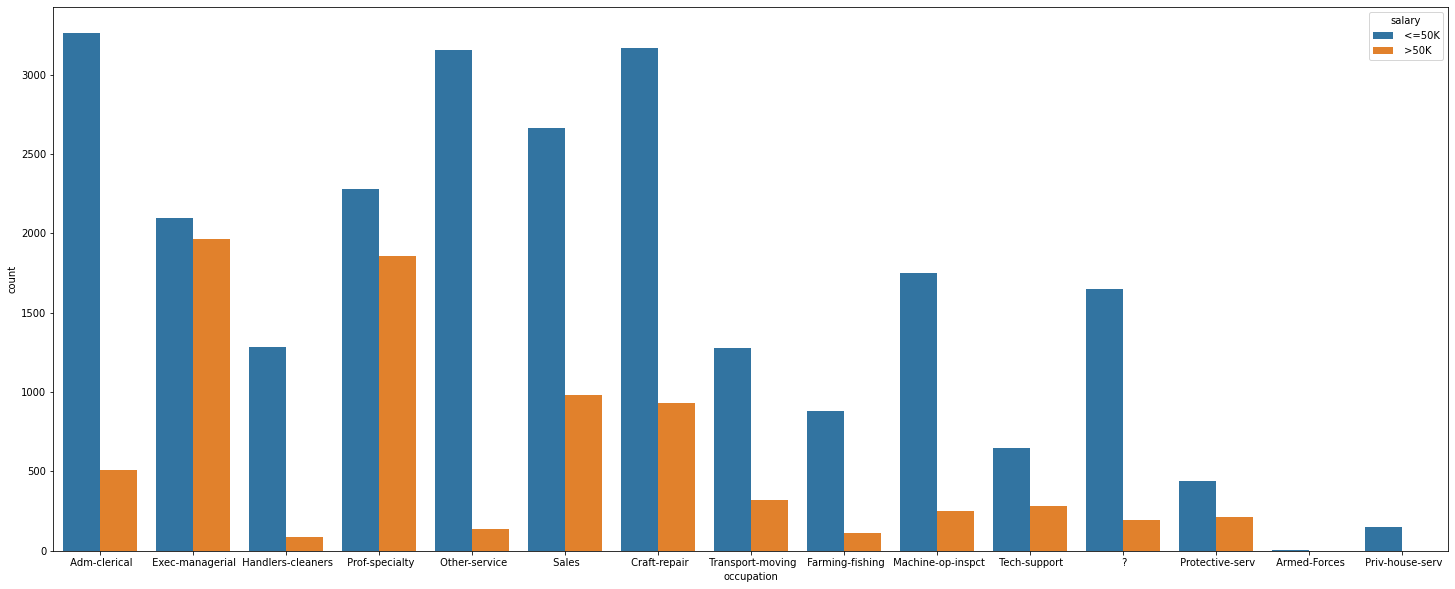

In [16]:
plt.figure(figsize=(25,10))
sns.countplot(x='occupation',hue='salary',data=df)
plt.show()

more number of employee who earn less than or equal to 50K are in adm-clerical , craft repair occupations(other-service is group of occupations so not included).  more number of employee who earn greater than 50K are in exec-managerial and prof-speciality occupations.  

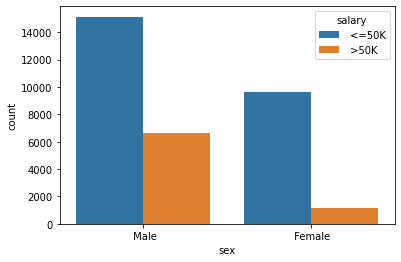

In [17]:
sns.countplot(x='sex',hue='salary',data=df)

based on this there are more male employee than female and male are higher in both saralry categories also

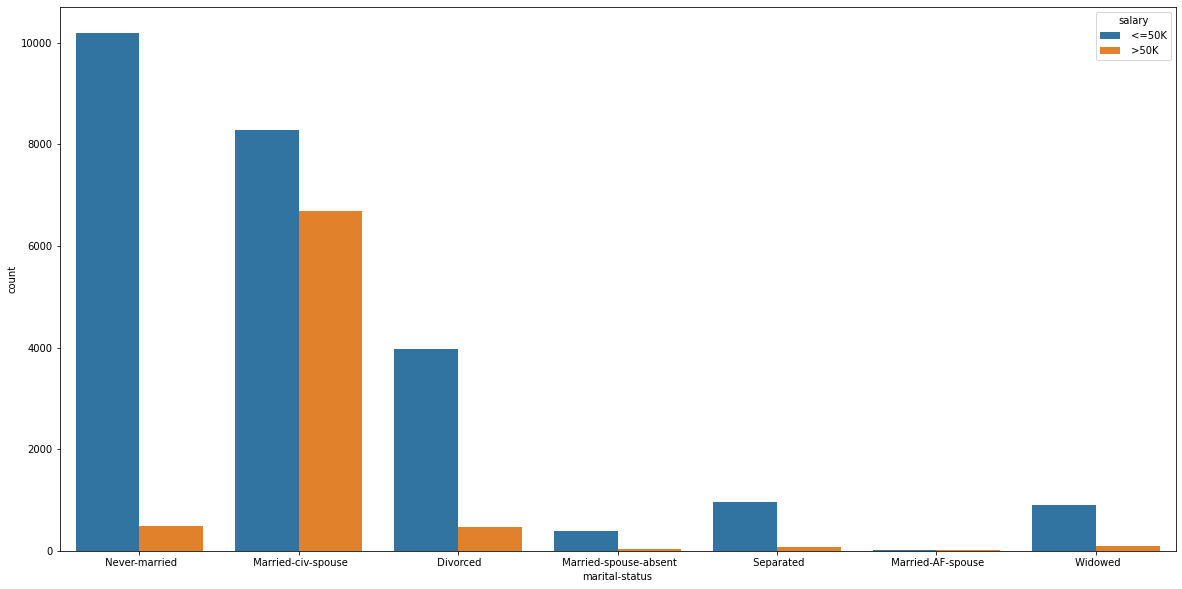

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x='marital-status',hue='salary',data=df)
plt.show()

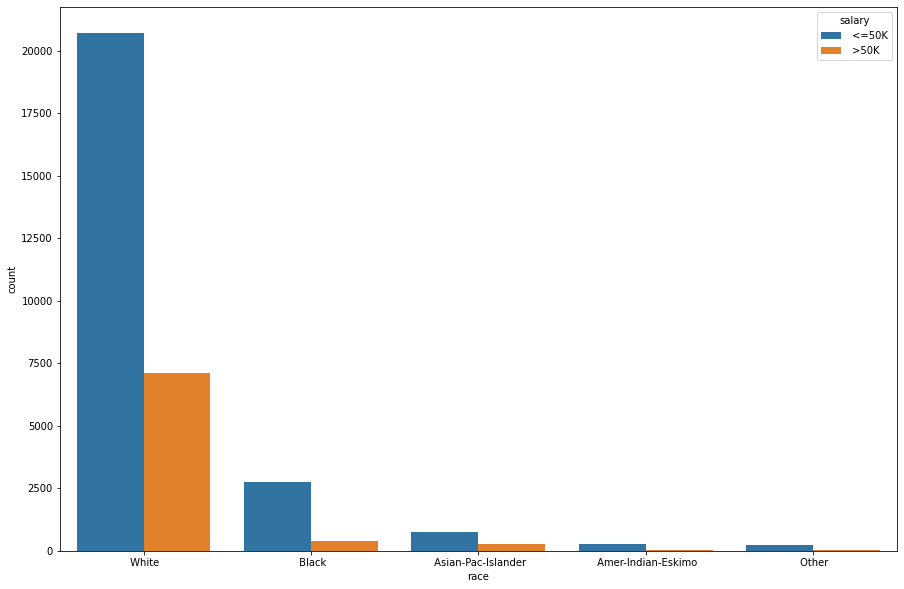

In [19]:
plt.figure(figsize=(15,10))
sns.countplot(x='race',hue='salary',data=df)
plt.show()

**Handling outliers:**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


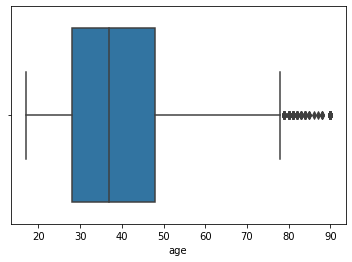

In [20]:
sns.boxplot(df['age'])

here it looks like outlier but it may be not. it may be some useful information. this dilemma may get cleared with good amount of domain knowledge. 

so for now i am gonna clip it

In [21]:
print(df['age'].quantile(0.99))

74.0


In [22]:
df['age'].clip(upper=74.0,inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


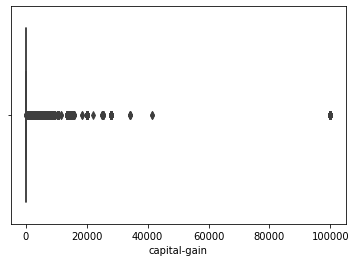

In [23]:
sns.boxplot(df['capital-gain'])

In [24]:
print(df['capital-gain'].quantile(0.99))

15024.0


In [25]:
df['capital-gain'].clip(upper=15024.0,inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


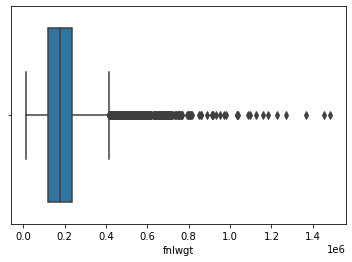

In [26]:
sns.boxplot(df['fnlwgt'])

In [27]:
print(df['fnlwgt'].quantile(0.99))

510072.0


In [28]:
df['fnlwgt'].clip(upper=510072.0,inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


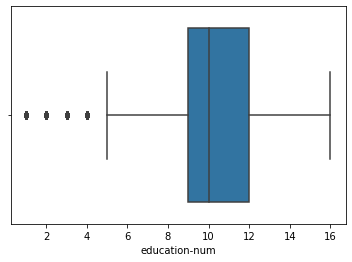

In [29]:
sns.boxplot(df['education-num'])

In [30]:
print(df['education-num'].quantile(0.01))

3.0


In [31]:
df['education-num'].clip(lower=3.0,inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


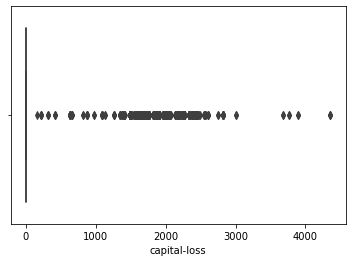

In [32]:
sns.boxplot(df['capital-loss'])

In [33]:
print(df['capital-loss'].quantile(0.99))

1980.0


In [34]:
df['capital-loss'].clip(upper=1980.0,inplace= True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


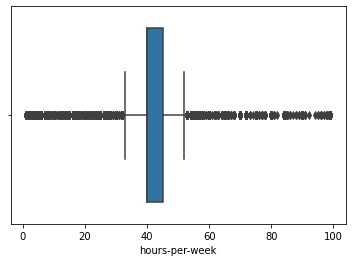

In [35]:
sns.boxplot(df['hours-per-week'])

In [36]:
print(df['hours-per-week'].quantile(0.01))
print(df['hours-per-week'].quantile(0.99))

8.0
80.0


In [37]:
df['hours-per-week'].clip(lower=8.0,upper=80.0,inplace= True)

###separating x & y

In [38]:
X = df.drop('salary',axis=1)
y = df['salary']

In [39]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba


###encoding

In [43]:
x = pd.get_dummies(X,drop_first=True)

In [44]:
x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


###separating train and test sets

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train , x_test , y_train , y_test = train_test_split(X,y, test_size = 0.30 ,random_state = 1)

###scalling

In [47]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x_train)
x_train = norm.transform(x_train)
x_test = norm.transform(x_test)

###model building

**Logistic regression:**

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()

In [50]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [51]:
logpred = lr.predict(x_test)

In [52]:
#Evaluation:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,logpred))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7550
        >50K       0.71      0.62      0.66      2219

    accuracy                           0.86      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.85      0.86      0.85      9769



In [53]:
logacc = accuracy_score(y_test,logpred)
logacc

0.8562800696079435

**Decision Tree:**

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [55]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
dtpred = dt.predict(x_test)

In [57]:
print(classification_report(y_test,dtpred))

              precision    recall  f1-score   support

       <=50K       0.89      0.87      0.88      7550
        >50K       0.58      0.63      0.61      2219

    accuracy                           0.81      9769
   macro avg       0.74      0.75      0.74      9769
weighted avg       0.82      0.81      0.82      9769



In [58]:
dtacc = accuracy_score(y_test,dtpred)
dtacc

0.8146176681338929

**Random forest:**

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500)

In [60]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500)

In [61]:
rfpred = rf.predict(x_test)

In [62]:
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91      7550
        >50K       0.72      0.64      0.68      2219

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.86      0.86      0.86      9769



In [63]:
rfacc = accuracy_score(y_test,rfpred)
rfacc

0.8608864776333299

**XG boost:**

In [64]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [65]:
xgb.fit(x_train,y_train)

XGBClassifier()

In [66]:
xgbpred = xgb.predict(x_test)

In [67]:
print(classification_report(y_test,xgbpred))

              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      7550
        >50K       0.77      0.61      0.68      2219

    accuracy                           0.87      9769
   macro avg       0.83      0.78      0.80      9769
weighted avg       0.86      0.87      0.86      9769



In [68]:
xgbacc = accuracy_score(y_test,xgbpred)
xgbacc

0.8687685535878801

**printing all accuracies:**

In [69]:
print('logistic regression: ',logacc)
print('decision tree: ',dtacc)
print('random forest: ',rfacc)
print('XG_Boost: ',xgbacc)

logistic regression:  0.8562800696079435
decision tree:  0.8146176681338929
random forest:  0.8608864776333299
XG_Boost:  0.8687685535878801


Among all the classifiers we applied, we got high accuracy with  XGBclassifier 

But we can't say it's best . because we used a single test set , which may be favourable to XGBoosting model. to check this we  compute other accuracies on other test sets . to do that we use k-fold cross validation.  

**k-fold cross validation on XGBooosting model:**

In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
kxgaccs = cross_val_score(estimator=xgb,X=x_train,y=y_train,cv=10)

In [72]:
print("accuracy: {:.2f} %".format(kxgaccs.mean()*100))

accuracy: 86.10 %


we got final accuraacy of 86.10%% on this model

it is ok but it may get improved by doing preprocessing againg mostly in outliers part and trying some more different combinations of algorithms. 